## K Nearest Neighbors

*The nearest neighbors method* (k-Nearest Neighbors, or k-NN) follows the intuition that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

Many types of distances (like euclidian)

In [1]:
import numpy as np
def dist(x,y):
    sum2 = np.sum((x-y)**2)
    distance = np.sqrt(sum2)
    return distance

![Knn Example](../../img/knn1.png)

![Knn Example 2](../../img/knn2.png)

### KNN Algorithm

```python
def knn(K):
    for all data points:
        calculate distance to all other points
        select K neighbors
        set t = average of the targets values of neighbors
    return t     
```

$$\Large Predicted = \frac{1}{K} \sum\limits_{x_i \in N} y_i $$

### Code Dictionary
code | description
-----|------------
`.KNeighborsRegressor` | Regression model with Decision Trees.
`.arrange()` | Generates evenly spaced values within a given interval.
`.reshape()` | Gives a new shape to an array without changing its data.

In [19]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

## Get the Data

Big mart sales prediction form various attribute
Set index_col=0 to use the first column as the index.

In [20]:
df = pd.read_csv("Bigmart_sales_Train.csv")
df_test = pd.read_csv("Bigmart_sales_Test.csv")

In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Impute missing values

In [24]:
print(df.isnull().sum())

#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [25]:
#do same for test data
mean = df_test['Item_Weight'].mean()
df_test['Item_Weight'].fillna(mean, inplace =True)

mode = df_test['Outlet_Size'].mode() #imputing outlet size with mode
df_test['Outlet_Size'].fillna(mode[0], inplace =True)

#### Remove unecessary columns and deal with Categorical variables

In [7]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [26]:
df_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df_test = pd.get_dummies(df_test)
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


#### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.2)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

In [47]:
x_train = x_train._get_numeric_data()
x_test = x_test._get_numeric_data()

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [50]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

In [51]:
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [53]:
x_train_scaled

array([[0.84221494, 0.14433759, 0.51943562, 0.91666667],
       [0.33581423, 0.35002769, 0.34124171, 0.58333333],
       [0.4943522 , 0.02075788, 0.5637916 , 0.        ],
       ...,
       [0.81542126, 0.57169503, 0.33772301, 0.58333333],
       [0.49091992, 0.07327889, 0.81600894, 0.5       ],
       [0.20125037, 0.0533827 , 0.07956336, 0.08333333]])

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn = KNeighborsRegressor(n_neighbors=1)

In [55]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [56]:
pred = knn.predict(x_test)

In [58]:
pred

array([3149.234 , 1556.6404, 5528.1374, ...,  675.787 , 1255.033 ,
       1198.44  ])

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [60]:
range_of_neighbors = range(1,50)

In [63]:
def iterate_n():
    rmse_val = [] #to store rmse values for different k
    for K in range_of_neighbors:
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)
        model.fit(x_train, y_train)  #fit the model
        pred=model.predict(x_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)

In [67]:
rmse_val = [] #to store rmse values for different k
for K in range_of_neighbors:
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #    print('RMSE value for k= ' , K , 'is:', error)

In [68]:
#iterate_n()

Text(0,0.5,'Error Rate')

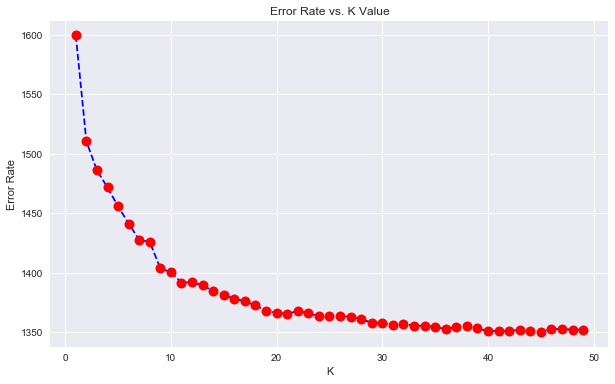

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range_of_neighbors,rmse_val,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')